# Homework 2 - Least Sqaures
Make sure you have downloaded:
- housing.csv

In this assignment we will use data about the price of housing vs lot size

In [1]:
######## DO NOT CHANGE THIS CODE ##########
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")
display(df)
###########################################

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


# 1 Create training and test data
## 1.1 Get X and y
1. [1 pt] Define the following numpy arrays by choosing the correct columns of the housing dataframe:
    - $\texttt{X}$, which contains the 'lotsize' column
    - $\texttt{y}$, which contains the 'price' column
2. [1 pt] Print the shapes of $\texttt{X}$ and $\texttt{y}$.

In [3]:
# TODO extract price and lotsize columns as np arrays
X = df[['lotsize']]
y = df['price']

# TODO print the shapes of X and Y
print(f"X shape {X.shape} and Y shape {y.shape}")

X shape (546, 1) and Y shape (546,)


## 1.2 Train-test split
1. [1 pt] Create new numpy column arrays called $\texttt{X\_train, X\_test, y\_train}$, and $\texttt{y\_test}$, where:
    - you use train_test_split() function from sklearn.model_selection
    - the training dataset contains the 80% of samples
    - the testing dataset contains the 20% of samples
    - random state set to 0.

2. [2 pt] Print the shape of the training and testing datasets. Make sure the prints are informative.

In [4]:
# TODO split train and test data
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# TODO print
print(f"Shapes of train and test data are {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

Shapes of train and test data are (436, 1), (110, 1), (436,), (110,)


## 1.3 Scatter plot
1. [1 pt] On the same figure, make scatterplots of the training and testing data.
    - x-coordinate should be the lot size, X, and 
    - y-coordinate should be the price, Y.
2. [1 pt] Use markers with different shapes and colors to show to training and testing datasets. 
3. [1 pt] Include 
    - x axis labels, 
    - y axis labels, 
    - grid lines,
    - an approapriate title, and 
    - a legend.

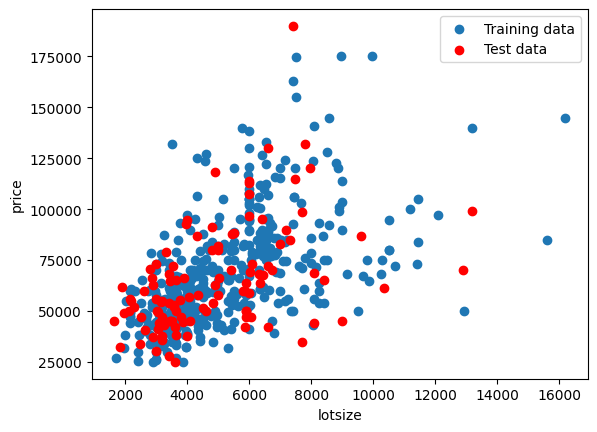

In [21]:
# TODO plot
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.legend()
plt.show()

# 2 (Manual) Least Squares Linear Regression
## 2.1 Obtain coefficients
[2 pt] Without using sklearn or other packages, implement least squares linear regression to fit a line to the __training__ data using the linear model, 
    $$Y=a^T X + b,$$
    where $a$ is a vector of weight coefficients for each feature and $b$ is a scalar offset. (You should follow the implementation seen in lecture.)

Compute the fitted values for $a$ and $b$ and print them. 
- Make sure you specify in your prints, which is $a$ and which is $b$.

In [23]:
# TODO code up manual linear regression

# TODO compute a and b and print

import numpy as np

# Step 1: Add a column of ones to X_train to account for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add a column of ones

# Step 2: Apply the normal equation to find the best fitting parameters
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Extracting a and b from the theta_best
b = theta_best[0]  # Intercept term
a = theta_best[1:]  # Coefficients for the features

# Print a and b
print("Coefficient (a):", a)
print("Intercept (b):", b)

Coefficient (a): [6.88540888]
Intercept (b): 33003.36216890107


## 2.2 Predict
[1 pt] Use your custom fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_linear}$. Your method should involve matrix multiplications.

In [7]:
# TODO predict

# Prepare X_test by adding a column of ones for the intercept
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add a column of ones

# Predict using the model
Y_test_pred_linear = X_test_b.dot(theta_best)

# Y_test_pred_linear now contains the predicted values for Y_test

# 3 (sklearn) Least Squares Linear Regression
## 3.1 Obtain coefficients
[2 pt] Use sklearn.linear_model.LinearRegression to fit a linear model to the training data. See their documentation for how to use the model.
- You may need to reshape the data to column arrays by array.reshape(-1,1).

Extract the fitted values for $a$ and $b$ and print them. Make sure you specify in your prints, which is $a$ and which is $b$.
- At this point, you should verify that the $a$ and $b$ values you obtained manually and by sklearn are basically the same.

In [8]:
from sklearn.linear_model import LinearRegression

# TODO use sklearn
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


# TODO extract a and b, and print
a_sklearn = model.coef_[0]  # Coefficient for the feature
b_sklearn = model.intercept_  # Intercept term

# Print the coefficients
print("Coefficient (a) from sklearn:", a_sklearn)
print("Intercept (b) from sklearn:", b_sklearn)

Coefficient (a) from sklearn: 6.885408879999409
Intercept (b) from sklearn: 33003.36216890106


## 3.2 Predict
[1 pt] Use your sklearn fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_sklearn}$. You should use sklearn functions/methods for this.

In [9]:
# TODO predict

Y_test_pred_sklearn = model.predict(X_test)


## 3.3 Verify correctness
[1 pt] Write code, with any relevant prints, to verify that $\texttt{Y\_test\_pred\_linear}$ and $\texttt{Y\_test\_pred\_sklearn}$ are the same.    
- You can use the np.allclose() function. You may need to flatten the sklearn prediction array $\texttt{Y\_test\_pred\_sklearn}$.

In [10]:
# TODO verify

import numpy as np

# Verify the predictions are close to each other
are_predictions_close = np.allclose(Y_test_pred_linear.flatten(), Y_test_pred_sklearn.flatten(), atol=1e-5)
print("Are the manual and sklearn predictions close?", are_predictions_close)

Are the manual and sklearn predictions close? True


## 3.4 Plot
[3 pt] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points, based on linear model.
3. Straight line plot of linear model, which you should base of the fitted coefficients. 

[1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Your figure must include 
- x axis labels, 
- y axis labels, 
- gridlines, 
- an approapriate title, and 
- a legend.

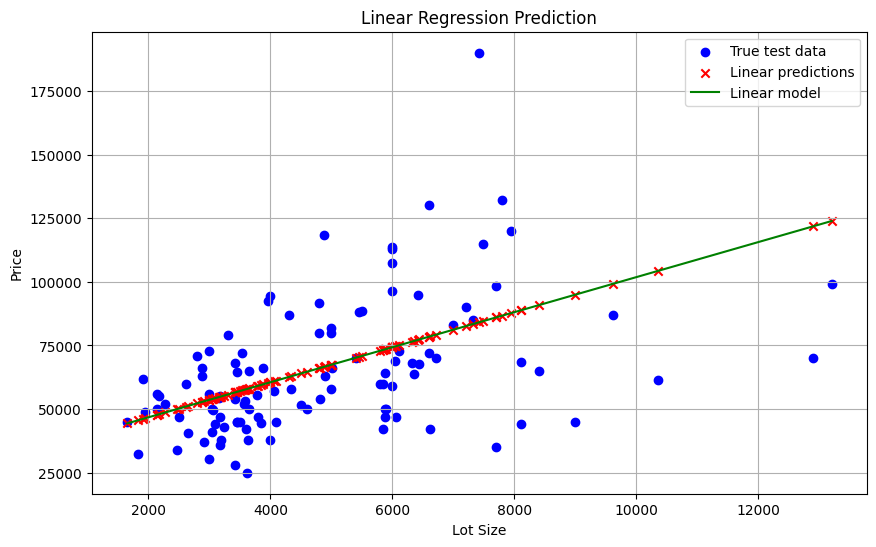

In [24]:
# TODO plot

plt.figure(figsize=(10, 6))

# Scatter plot of true test data
plt.scatter(X_test, y_test, color='blue', label='True test data')

# Scatter plot of prediction on test points
plt.scatter(X_test, Y_test_pred_linear, color='red', label='Linear predictions', marker='x')

# Straight line plot of linear model
x_values = np.array([X_test.min(), X_test.max()])
y_values = a * x_values + b
plt.plot(x_values, y_values, color='green', label='Linear model')

# Enhancements
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.grid(True)
plt.title('Linear Regression Prediction')
plt.legend()

plt.show()


## 3.5 Discuss
[1 pt] Is the method of least squares linear regression appropriate for the housing data? Why or why not? In particular, we seek your reflection on whether the data is suitable for linear modelling.

**Ans:** The plot shows positive correlation between lot size and price, so it's not too bad. However, a simple linear model may not be able to capture all the variance and be that predictive as there seems to be a lot of other factors and/or non-linearity in the model

# 4 (Manual) Least Squares on 4th order polynomial
## 4.1 Obtain Coefficients
Now, suppose we instead used the 4th order polynomial model
$$
Y = a_4 x^4 +  a_3x^3 + \dots + a_1 x + a_0.
$$
[2 pt] Compute and print the fitted coefficients $a_0, \dots, a_4$. You must do this using the custom/manual method, not via sklearn package. 
- Print them to 12 decimal places.

In [25]:
# TODO code up custom linear regression

# TODO compute a and b, and print
# Assuming X_train is a single feature column vector

# Generate polynomial features manually for a 4th order polynomial
X_train_squared = X_train ** 2
X_train_cubed = X_train ** 3
X_train_quad = X_train ** 4

# Combine the polynomial features into a single matrix
X_train_poly = np.hstack((X_train, X_train_squared, X_train_cubed, X_train_quad))

# Add a column of ones to include the intercept term in the model
X_poly_b = np.c_[np.ones(X_train_poly.shape[0]), X_train_poly]

# Apply the normal equation to find the best fitting parameters
theta_poly_best = np.linalg.inv(X_poly_b.T.dot(X_poly_b)).dot(X_poly_b.T).dot(y_train)

# Print the coefficients to 12 decimal places
coeff_labels = ['a_0', 'a_1', 'a_2', 'a_3', 'a_4']
for i, coeff in enumerate(theta_poly_best):
    print(f"{coeff_labels[i]}: {coeff:.12f}")


a_0: 64211.282009567702
a_1: -25.112345780312
a_2: 0.009191489008
a_3: -0.000000937023
a_4: 0.000000000030


## 4.2 Predict
[1 pt] Use your fitted coefficients to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_poly}$. Your method should involve matrix multiplications.

In [26]:
# TODO predict
# Generate polynomial features manually for X_test
X_test_squared = X_test ** 2
X_test_cubed = X_test ** 3
X_test_quad = X_test ** 4

# Combine the polynomial features into a single matrix for X_test
X_test_poly = np.hstack((X_test, X_test_squared, X_test_cubed, X_test_quad))

# Add a column of ones to include the intercept term
X_test_poly_b = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly]

# Predict using the model
Y_test_pred_poly = X_test_poly_b.dot(theta_poly_best)


## 4.3 Plot
[3 pt] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points, based on polynomial model.
3. Curved line plot of polynomial model, which are based off the fitted coefficients. 

[1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Your figure must include 
- x axis labels, 
- y axis labels, 
- gridlines, 
- an approapriate title, and 
- a legend.

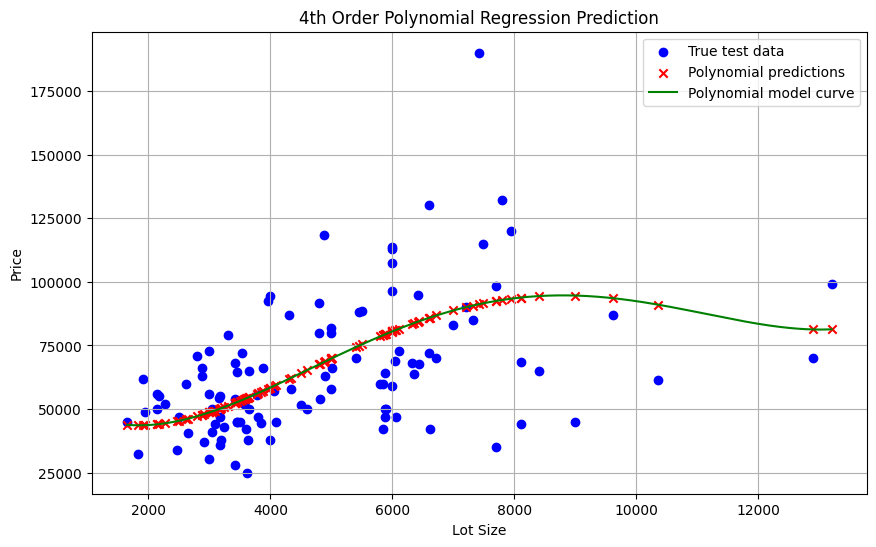

In [27]:
# TODO plot

# Generating points for the polynomial curve
x_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
x_range_squared = x_range ** 2
x_range_cubed = x_range ** 3
x_range_quad = x_range ** 4
x_range_poly = np.hstack((x_range, x_range_squared, x_range_cubed, x_range_quad))
x_range_poly_b = np.c_[np.ones(x_range_poly.shape[0]), x_range_poly]
y_range_poly = x_range_poly_b.dot(theta_poly_best)

plt.figure(figsize=(10, 6))

# Scatter plot of true test data
plt.scatter(X_test, y_test, color='blue', label='True test data')

# Scatter plot of prediction on test points based on polynomial model
plt.scatter(X_test, Y_test_pred_poly, color='red', label='Polynomial predictions', marker='x')

# Curved line plot of polynomial model
plt.plot(x_range, y_range_poly, color='green', label='Polynomial model curve')

# Enhancements
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('4th Order Polynomial Regression Prediction')
plt.grid(True)
plt.legend()

plt.show()


## 4.4 Compare linear (1st order) and polynomial (4th order)
1. [1 pt] Compute the residual sum of squares (RSS) on the test points of both:
- 1st order model, $\texttt{rss\_linear}$
- 4th order model, $\texttt{rss\_poly}$

(The residual is "the actual values of $\texttt{Y}$" minus "predicted values from the linear model." RSS is the sum of (squares of residual); this is just a (nonnegative) scalar value that gives one way to measure performance of the models.)

2. [1 pt] Print $\texttt{rss\_linear}$ and $\texttt{rss\_poly}$.

In [28]:
# TODO compute RSS

# Compute RSS for the polynomial model
rss_poly = np.sum((y_test - Y_test_pred_poly) ** 2)
rss_linear = np.sum((y_test - Y_test_pred_linear) ** 2)

# TODO print RSS

# Assuming you already have rss_linear from the previous linear regression part
print(f"RSS for linear model: {rss_linear}")
print(f"RSS for 4th order polynomial model: {rss_poly}")

if rss_poly < rss_linear:
    print("The 4th order polynomial model has a lower RSS")


RSS for linear model: 59831334701.52834
RSS for 4th order polynomial model: 55574161655.14971
The 4th order polynomial model has a lower RSS


3. [1 pt] Which RSS is smaller? Does it necessarily mean that the model with smaller RSS is always "better"? Why or why not?

    **Ans:** The 4th order polynomial has a lower RSS than the linear model. While a lower RSS indeed tends to indicate that this specific model is a better fit of the test data, it doesn't mean the model is necessarily better. It's likely the 4th degree polynomial model has a good degree of overfitting like a nonsensical dip in house price from 8000 lot size to 10,000. As such, it may not be a "better" model since it is less good at extrapolating and predicting prices of data not in the training set.